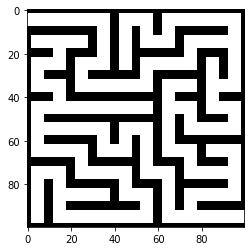

In [16]:
# Code by jollysoul
 
import random
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
 
num_rows = int(input("Rows: ")) # number of rows
num_cols = int(input("Columns: ")) # number of columns
 
# The array M is going to hold the array information for each cell.
# The first four coordinates tell if walls exist on those sides 
# and the fifth 
# indicates if the cell has been visited in the search.
# M(LEFT, UP, RIGHT, DOWN, CHECK_IF_VISITED)
M = np.zeros((num_rows,num_cols,5), dtype=np.uint8)
 
# The array image is going to be the output image to display
image = np.zeros((num_rows*10,num_cols*10), dtype=np.uint8)
 
# Set starting row and column
r = 0
c = 0
history = [(r,c)] # The history is the stack of visited locations
 
# Trace a path though the cells of the maze and open walls along the path.
# We do this with a while loop, repeating the loop until there is no history, 
# which would mean we backtracked to the initial start.
while history: 
    M[r,c,4] = 1 # designate this location as visited
    # check if the adjacent cells are valid for moving to
    check = []
    if c > 0 and M[r,c-1,4] == 0:
        check.append('L')  
    if r > 0 and M[r-1,c,4] == 0:
        check.append('U')
    if c < num_cols-1 and M[r,c+1,4] == 0:
        check.append('R')
    if r < num_rows-1 and M[r+1,c,4] == 0:
        check.append('D')    
    
    if len(check): # If there is a valid cell to move to.
        # Mark the walls between cells as open if we move
        history.append([r,c])
        move_direction = random.choice(check)
        if move_direction == 'L':
            M[r,c,0] = 1
            c = c-1
            M[r,c,2] = 1
        if move_direction == 'U':
            M[r,c,1] = 1
            r = r-1
            M[r,c,3] = 1
        if move_direction == 'R':
            M[r,c,2] = 1
            c = c+1
            M[r,c,0] = 1
        if move_direction == 'D':
            M[r,c,3] = 1
            r = r+1
            M[r,c,1] = 1
    else: # If there are no valid cells to move to.
    # retrace one step back in history if no move is possible
        r,c = history.pop()
    
         
# Open the walls at the start and finish
M[0,0,0] = 1
M[num_rows-1,num_cols-1,2] = 1
    
# Generate the image for display
for row in range(0,num_rows):
    for col in range(0,num_cols):
        cell_data = M[row,col]
        for i in range(10*row+2,10*row+8):
            image[i,range(10*col+2,10*col+8)] = 255
        if cell_data[0] == 1: 
            image[range(10*row+2,10*row+8),10*col] = 255
            image[range(10*row+2,10*row+8),10*col+1] = 255
        if cell_data[1] == 1: 
            image[10*row,range(10*col+2,10*col+8)] = 255
            image[10*row+1,range(10*col+2,10*col+8)] = 255
        if cell_data[2] == 1: 
            image[range(10*row+2,10*row+8),10*col+9] = 255
            image[range(10*row+2,10*row+8),10*col+8] = 255
        if cell_data[3] == 1: 
            image[10*row+9,range(10*col+2,10*col+8)] = 255
            image[10*row+8,range(10*col+2,10*col+8)] = 255
        
 
# Display the image
plt.imshow(image, cmap = cm.Greys_r, interpolation='none')
plt.show()